In [1]:
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
plt.style.use('bmh')

In [2]:
import os
print(os.getcwd())

C:\Users\aluca\Github\PlethMachineLearning


In [3]:
# Loading Data
data_train = np.load('data_train_type2.npy', allow_pickle=True)
labels_train = np.load('labels_train_type2.npy', allow_pickle=True)

print(data_train.shape, labels_train.shape)

(696, 16) (696,)


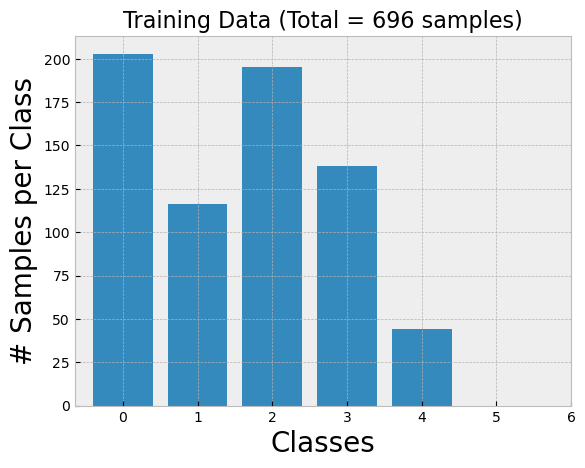

In [4]:
# Counting number samples per class
vals, counts = np.unique(labels_train, return_counts=True)

plt.bar(vals, counts)
plt.xticks(range(7),range(7))
plt.xlabel('Classes',size=20)
plt.ylabel('# Samples per Class', size=20)
plt.title('Training Data (Total = '+str(data_train.shape[0])+' samples)',size=16);

In [21]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from skimage.transform import resize
from sklearn.svm import SVC
#from sklearn.metrics import roc_curve, roc_auc_score
#import cv2

## 1.) LINEAR REGRESSION FEATURE #1 (frequency) 

In [22]:
# Selecting a specific feature
feature_index = 9
X_train_feature = data_train[:, feature_index].reshape(-1, 1)

In [25]:
# Splitting the data into train and test sets
X_train, X_test, t_train, t_test = train_test_split(X_train_feature, labels_train, 
                                                   test_size=0.2,
                                                   stratify=labels_train,
                                                   random_state=0)

In [27]:
print("X_train_feature shape:", X_train.shape)
print("t_train shape:", t_train.shape)

X_train_feature shape: (556, 1)
t_train shape: (556,)


In [29]:
#mod1 = Pipeline([('SCALER', StandardScaler()),('LOGRES', LogisticRegression())])

mod1 = LinearRegression()
mod1.fit(X_train, t_train)

LinearRegression()

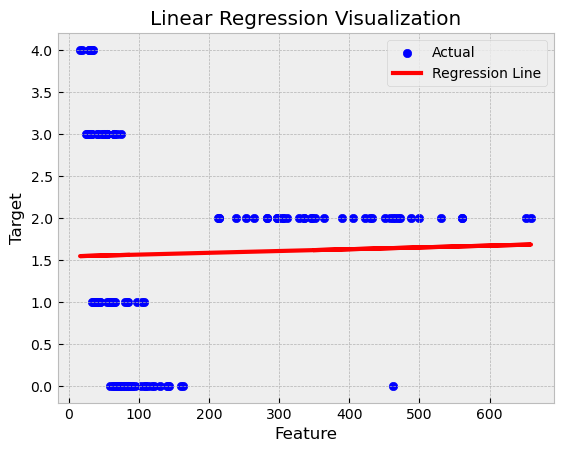

In [30]:
# Make predictions
predictions = mod1.predict(X_test)

# Plot the data points
plt.scatter(X_test, t_test, color='blue', label='Actual')

# Plot the regression line
plt.plot(X_test, predictions, color='red', linewidth=3, label='Regression Line')

plt.title('Linear Regression Visualization')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()